In [1]:
import os
os.getcwd()

In [2]:
os.chdir("D:\\DS_portfolio")

Import liabraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data downloaded from book crossing dataset

In [4]:
book_df = pd.read_csv("D:\\DS_portfolio\\Book_recommender\\BX-Books.csv",sep=';', error_bad_lines=False, encoding="latin-1")
book_df.head()
book_df.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [5]:
user_df = pd.read_csv('D:\\DS_portfolio\\Book_recommender\\BX-Users.csv', sep=';', error_bad_lines=False, encoding ="latin-1")
user_df.head()
user_df.columns=['User-ID', 'Location', 'Age']

In [6]:
rating_df = pd.read_csv('D:\\DS_portfolio\\Book_recommender\\BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding ="latin-1")
rating_df.head()
rating_df.columns = ['User-ID', 'ISBN', 'Book-Rating']

# Exploratory Data Analysis to see trend and patterns in three datasets

In [7]:
print(book_df.shape)
print(user_df.shape)
print(rating_df.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


Book data set EDA

In [8]:
book_df.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


Dropping the url columns, it is not necessary for EDA

In [9]:
book_df.drop(['imageUrlS', 'imageUrlL', 'imageUrlM'],axis=1,inplace=True)

In [10]:
#check the book dataframe again
book_df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [11]:
# check data type for df
book_df.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [12]:
book_df.bookTitle.unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [13]:
book_df.ISBN.unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

In [14]:
#check for unique values
book_df.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

data type of column yearOfPublishing change to int and replace incorrect entries as Nan and later convert it to mean of years

In [15]:
book_df.yearOfPublication =pd.to_numeric(book_df.yearOfPublication, errors = 'coerce')

In [16]:
print (sorted(book_df['yearOfPublication'].unique()))

[0.0, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2024.0, 2026.0, 2030.0, 2037.0, 2038.0, 2050.0, nan]


The dataset is from 2004 so keeping the data till year 2006 and rest will replace with Nan and in case of missing year a mean of year will used

In [17]:
book_df.loc[(book_df.yearOfPublication>2006)|(book_df.yearOfPublication==0), 'yearOfPublication']=np.NAN

In [18]:
book_df.yearOfPublication.fillna(round(book_df.yearOfPublication.mean()),inplace=True) 

In [19]:
book_df.yearOfPublication = book_df.yearOfPublication.astype(np.int32)

Exploring Publisher column for any missing values

In [20]:
book_df.publisher.unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [21]:
book_df.loc[book_df.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


We will replace the Nan values with 'other'

In [22]:
book_df.loc[(book_df.ISBN=='193169656X'), 'publisher']=='other'
book_df.loc[(book_df.ISBN=='1931696993'),'publisher']=='other'

129037    False
Name: publisher, dtype: bool

In [23]:
book_df.loc[book_df.publisher =='other']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


# Exploring the User data set

In [24]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [25]:
user_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

Finding the age distrubuiton among users

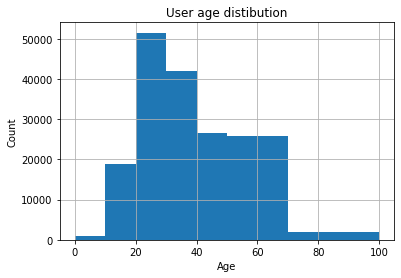

In [26]:
user_df.Age.hist(bins=[0,10,20,30,40,50,70,100])
plt.title('User age distibution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Age group between 20-40 is most active user group in the dataset

# Exploring Rating data set

In [27]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Rating based recommendation

In [28]:
count_rating = pd.DataFrame(rating_df.groupby('ISBN')['Book-Rating'].count())


In [29]:
count_rating.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


Let's find out more about the top 5 most rated ISBN and further recommemdation

In [30]:
#create a dataframe of top 5 most rated books
top_rated_books = pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'],index=np.arange(5),columns=['ISBN'])
#merge top_rated_books data frame with book_df data frame to retrieve information
top_rated_books_df = pd.merge(top_rated_books, book_df, on = 'ISBN')
top_rated_books_df

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA


The recommender system suggests if a reader liked 'Wild Animus' we can recommend 'The Lovely Bones..' to the same reader too.

# Correlation based recommender system

for correlation based recommender system we will use Pearson'R correlation between two book's ratings. We will first calculate the average rating and no of ratings each book received.

In [31]:
average_rating_df = pd.DataFrame(rating_df.groupby('ISBN')['Book-Rating'].mean())
average_rating_df['rating_count']=pd.DataFrame(rating_df.groupby('ISBN')['Book-Rating'].count())
average_rating_df.sort_values('rating_count', ascending=False).head()

,Book-Rating,rating_count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


The book with most rating is not highly rated, making a recommender system based on count of rating can be a mistake. We will do some data cleaning to make a better recommender system
we will exclude books with less than 100 ratings and users with less than 200 ratings for statistical significance

In [32]:
count_br = rating_df['Book-Rating'].value_counts()
ratings = rating_df[rating_df['Book-Rating'].isin(count_br[count_br >= 100].index)]
count_user = rating_df['User-ID'].value_counts()
ratings = rating_df[rating_df['User-ID'].isin(count_user[count_user>=200].index)]

We will create a rating matrix by converting table to 2D matrix. The matrix will sparse because not every user rated everybook

In [33]:
ratings_matrix = ratings.pivot_table(index='User-ID', columns='ISBN',values = 'Book-Rating')
print(ratings_matrix.shape)
ratings_matrix.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


find out the books which are correlated with 2nd most rated book 'the lovely bones...'

In [34]:
#rating of lonely book with books correlated to it
TLB_ratings = ratings_matrix['0316666343']

In [35]:
TLB_ratings.head()

User-ID
254     NaN
2276    NaN
2766    9.0
2977    NaN
3363    0.0
Name: 0316666343, dtype: float64

In [36]:
similar_to_TLB=ratings_matrix.corrwith(TLB_ratings)

In [37]:
similar_to_TLB.head()

ISBN
 0330299891   NaN
 0375404120   NaN
 0586045007   NaN
 9022906116   NaN
 9032803328   NaN
dtype: float64

In [38]:
corr_TLB = pd.DataFrame(similar_to_TLB,columns=['correlation'])
corr_TLB.dropna(inplace=True)
corr_TLB.head()

,correlation
ISBN,
0002005018,9.614813e-18
0002184974,1.000000e+00
0002250810,1.000000e+00
000225929X,1.000000e+00
0006127754,-1.000000e+00


join the corr_TLB dataframe and ratings data frame to retrive more information about the correlated books


In [39]:
corr_TLB = corr_TLB.join(average_rating_df['rating_count'])


In [40]:

corr_TLB.head()

,correlation,rating_count
ISBN,,
0002005018,9.614813e-18,14
0002184974,1.000000e+00,2
0002250810,1.000000e+00,3
000225929X,1.000000e+00,4
0006127754,-1.000000e+00,5


In [46]:
corr_TLB[corr_TLB['rating_count']>100].sort_values(by='correlation', ascending=False).head(10)

,correlation,rating_count
ISBN,,
0316666343,1.000000,1295
0345441036,0.750588,106
0552124753,0.704187,127
0684867621,0.618834,118
0446519138,0.600658,107
0743206045,0.580833,114
0743203631,0.571624,127
0451160525,0.552370,148
038550120X,0.551362,184


In [48]:
# join book data to get the info about books correlated to the lovely bones
corr_TLB_books= pd.DataFrame(['0345441036','0552124753', '0684867621', '0446519138', '0743206045', '0743203631','0451160525',
                            '038550120X', '0679772677'], index=np.arange(9), columns=['ISBN'])
books_corr_TLB = pd.merge(corr_TLB_books, book_df, on='ISBN')


In [50]:
books_corr_TLB.head(9)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0345441036,Black House,Stephen King,2002,Ballantine Books
1,0684867621,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner
2,0446519138,Simple Abundance: A Daybook of Comfort and Joy,Sarah Ban Breathnach,1995,Warner Books
3,0743206045,Daddy's Little Girl,Mary Higgins Clark,2002,Simon &amp; Schuster
4,0743203631,Gap Creek: The Story Of A Marriage,Robert Morgan,2000,Touchstone
5,0451160525,"The Gunslinger (The Dark Tower, Book 1)",Stephen King,1994,New American Library
6,038550120X,A Painted House,JOHN GRISHAM,2001,Doubleday
7,0679772677,A Civil Action,JONATHAN HARR,1996,Vintage


The top 3 books similar to The Lovely bones are Black house, The Girl who loved..., Simple abundace.
To make this recommender system beter we will work with Collaborative Filtering and KNN methods.